### UDsb1 Physical Eval

#### Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("OASIS3_UDSb1_physical_eval.csv")

In [3]:
# # Import the necessary module
# from ydata_profiling import ProfileReport

# # Create a ProfileReport object
# report = ProfileReport(df)

# # Generate the data profiling report
# report.to_file('oasis_3_report.html')

In [4]:
df.isnull().sum()

OASISID                   0
OASIS_session_label       0
days_to_visit             0
age at visit              0
WEIGHT                 1003
HEIGHT                 1763
BPSYS                  1027
BPDIAS                 1034
HRATE                  1859
VISION                 1848
VISCORR                1850
VISWCORR               3159
HEARING                1849
HEARAID                1858
HEARWAID               7442
dtype: int64

In [5]:
df.shape

(8626, 15)

In [6]:
df.drop('HEARWAID', axis=1, inplace=True)

In [7]:
# impute the missing values to the mean of the column
df.fillna(df.mean(), inplace=True)

C:\Users\Ananya\AppData\Local\Temp\ipykernel_30272\3216825617.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [8]:
df.isnull().sum()

OASISID                0
OASIS_session_label    0
days_to_visit          0
age at visit           0
WEIGHT                 0
HEIGHT                 0
BPSYS                  0
BPDIAS                 0
HRATE                  0
VISION                 0
VISCORR                0
VISWCORR               0
HEARING                0
HEARAID                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8626 entries, 0 to 8625
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OASISID              8626 non-null   object 
 1   OASIS_session_label  8626 non-null   object 
 2   days_to_visit        8626 non-null   int64  
 3   age at visit         8626 non-null   float64
 4   WEIGHT               8626 non-null   float64
 5   HEIGHT               8626 non-null   float64
 6   BPSYS                8626 non-null   float64
 7   BPDIAS               8626 non-null   float64
 8   HRATE                8626 non-null   float64
 9   VISION               8626 non-null   float64
 10  VISCORR              8626 non-null   float64
 11  VISWCORR             8626 non-null   float64
 12  HEARING              8626 non-null   float64
 13  HEARAID              8626 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 943.6+ KB


In [10]:
# convert days_to_visit to float
df['days_to_visit'] = df['days_to_visit'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8626 entries, 0 to 8625
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OASISID              8626 non-null   object 
 1   OASIS_session_label  8626 non-null   object 
 2   days_to_visit        8626 non-null   float64
 3   age at visit         8626 non-null   float64
 4   WEIGHT               8626 non-null   float64
 5   HEIGHT               8626 non-null   float64
 6   BPSYS                8626 non-null   float64
 7   BPDIAS               8626 non-null   float64
 8   HRATE                8626 non-null   float64
 9   VISION               8626 non-null   float64
 10  VISCORR              8626 non-null   float64
 11  VISWCORR             8626 non-null   float64
 12  HEARING              8626 non-null   float64
 13  HEARAID              8626 non-null   float64
dtypes: float64(12), object(2)
memory usage: 943.6+ KB


### Diagnosis CSV

#### Preprocessing

In [12]:
df2 = pd.read_csv("OASIS3_UDSd1_diagnoses.csv")

In [13]:
df2.isnull().sum()

OASISID                   0
OASIS_session_label       0
days_to_visit             0
age at visit              0
WHODIDDX               4477
                       ... 
ptsddx                 4855
ptsddxif               8498
alcabuse               8475
impsub                 4855
impsubif               8494
Length: 149, dtype: int64

In [14]:
df2.shape

(8499, 149)

In [33]:
# Import the necessary module
from ydata_profiling import ProfileReport

# Create a ProfileReport object
report = ProfileReport(df2)

# Generate the data profiling report
report.to_file('oasis_3_diagnosis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

##### Checking Skewness

In [23]:
# Set the option to display all rows without truncation
pd.set_option('display.max_rows', None)

# Display the DataFrame
df2.skew(axis=0, skipna=True)


C:\Users\Ananya\AppData\Local\Temp\ipykernel_30272\2808993986.py:5: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.skew(axis=0, skipna=True)


days_to_visit     1.245241
age at visit     -0.272663
WHODIDDX        -36.587783
NORMCOG          -1.197725
DEMENTED         -1.050830
MCIAMEM           1.731893
MCIAPLUS          1.217631
MCIAPLAN          1.006309
MCIAPATT          1.128485
MCIAPEX          -1.562940
MCIAPVIS          2.670018
MCINON1           5.429665
MCIN1LAN          4.123106
MCIN1ATT          1.771925
MCIN1EX          -0.114668
MCIN1VIS          0.000000
MCINON2           6.403613
MCIN2LAN          1.451132
MCIN2ATT         -0.175204
MCIN2EX          -0.114668
MCIN2VIS          0.000000
IMPNOMCI         -0.054067
PROBAD           -0.432974
PROBADIF          4.769574
POSSAD            0.265156
POSSADIF          1.511653
DLB               5.903634
DLBIF             0.305279
VASC              8.242836
VASCIF            0.571429
VASCPS            8.924099
VASCPSIF         -3.316625
ALCDEM           12.719960
ALCDEMIF          0.886766
DEMUN             4.840159
DEMUNIF           2.860973
FTD               9.186340
F

C:\Users\Ananya\AppData\Local\Temp\ipykernel_30272\2303555376.py:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df2.skew()


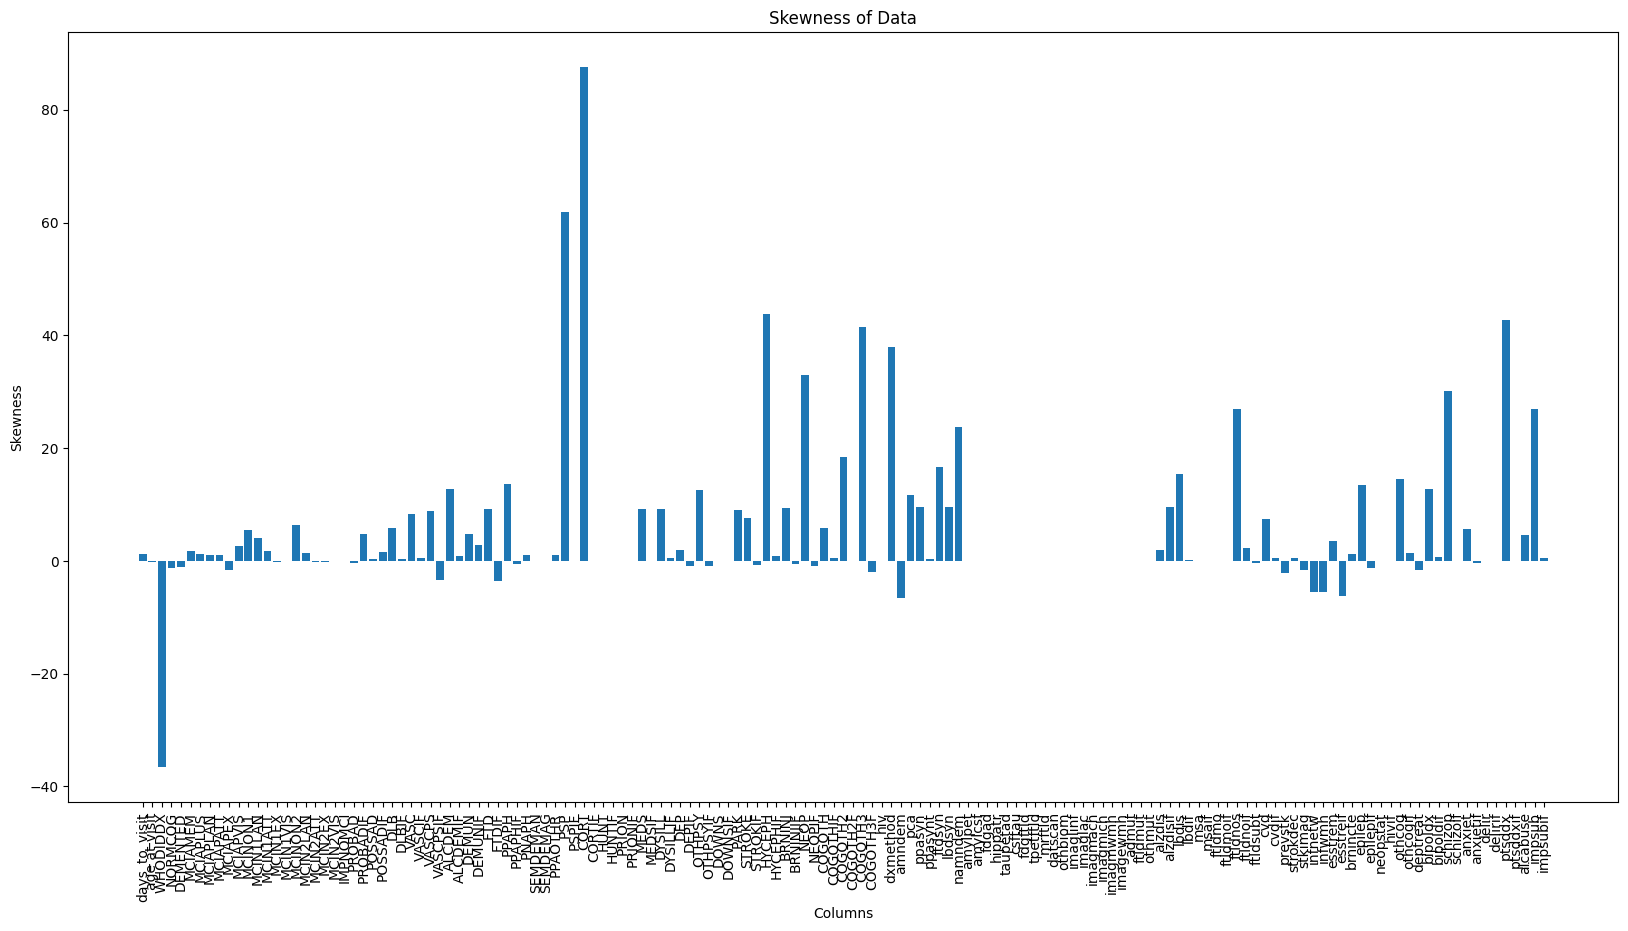

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

skewness = df2.skew()

# Plot the skewness values
plt.figure(figsize=(20, 10))
plt.bar(skewness.index, skewness.values)
plt.title("Skewness of Data")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.xticks(rotation=90)
plt.show()


In [26]:
# %matplotlib inline

# import matplotlib.pyplot as plt

# # Your plotting code here

# plt.show()  # Display the plot in the Jupyter Notebook output


In [32]:
import numpy as np
df2['HEIGHT'] = np.log(df2['HEIGHT'])
df2['BPDIAS'] = np.log(df2['BPDIAS'])

KeyError: 'HEIGHT'